# Lab 3: Logistic Regression

#Please fill your name 
<br>
Name: Tet Davann


In this lab we will focus on Logistic Regression. CADT would like to enhance their operations on validating the admission of the master students by having a software which automatically validate the admission based on the academic performances. You are asked to build a model which is capable to predict if the student is admitted for the master program.

The dataset of Graduate Admission will be given and the following table describes the fields of the dataset:

* Serial No. : Student serial number
* GRE Score: Score of GRE (out of 340)
* TOEFL Score: Score of TOEFL (out of 12)
* University Rating: Rate in university (out of 5)
* SOP : Strength of Statement of Purpose (out of 5)
* LOR : Strength of Recommendation Letter (out of 5)
* CGPA : GPA score of undergraduate (out of 10)
* Research : Research experience (either 0 or 1)
* Chance of Admit : Admit chance (ranging from 0 to 1)


Your  goal is to build a logistic regression model to predict the if the student is admitted or not for the master program based on its features.

## 1. Load the dataset from CSV file and display the top 5 records.

In [1]:
#import library
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

In [2]:
dataset = pd.read_csv('admission.csv')

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Data Analysis

### Display basic and statistic information of each column of the dataset. What do you know from this data?

In [4]:
# display basic information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
# display statistics infomation of dataset
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Check if there are any missing data

In [6]:
# check if there are any missing data.
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Check the correlation coefficent between input and output variables

In [7]:
# check the correlation coefficent between input and output variables
dataset.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### Plot correlation coefficent with heatmap

<Axes: >

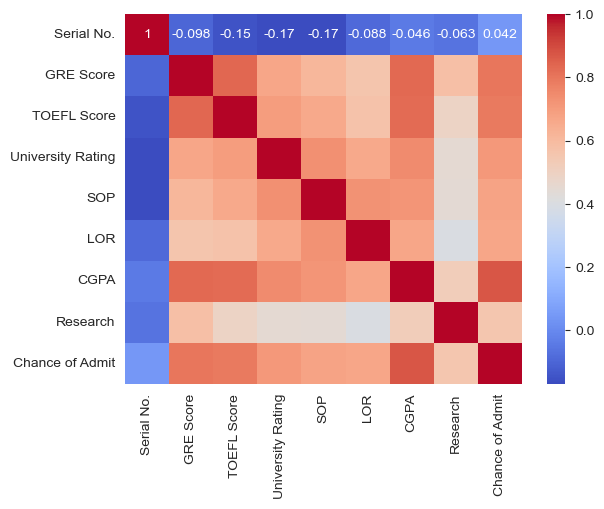

In [8]:
# plot correlation coefficent with heatmap
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

## 3. Feature Engineering

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
dataset_ = dataset.drop(columns=['Serial No.'])

In [11]:
dataset_['Chance of Admit'] = dataset_['Chance of Admit'].apply(lambda x: 1 if x >= 0.5 else 0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset_.drop(columns=['Chance of Admit']), dataset_['Chance of Admit'], test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)

StandardScaler()

## 3. Training

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# train model

model = LogisticRegression()
model.fit(scaler.transform(X_train), y_train)

LogisticRegression()

## 4. Testing

In [17]:

y_hat = model.predict(scaler.transform(X_test))

## 5. Evaluation

In [18]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_hat,output_dict=True)
print(pd.DataFrame(report).transpose())

              precision  recall  f1-score  support
0              1.000000  0.5000  0.666667  10.0000
1              0.933333  1.0000  0.965517  70.0000
accuracy       0.937500  0.9375  0.937500   0.9375
macro avg      0.966667  0.7500  0.816092  80.0000
weighted avg   0.941667  0.9375  0.928161  80.0000


## 6. Prediction

In [19]:
model.predict(scaler.transform(
    [
        [301 , 104, 3, 3.5, 4, 8.12, 1],
        [297, 96, 2, 2.5, 1.5, 7.89, 0  ]
    ]
    )
)

c:\Users\davan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int64)

In [20]:
import pickle as pkl

In [21]:
pkl.dump(model, open('../models/model1.pkl', 'wb'))

In [23]:
pkl.dump(scaler, open('../scalers/model.pkl', 'wb'))